In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [35]:
#Get the position, event and player data
pod = pd.read_csv('/Users/bhautik/Desktop/Desktop/Statistical Consulting/Data/Positionsdaten_DFL-MAT-J03YHV.csv')
evd = pd.read_csv("/Users/bhautik/Desktop/Desktop/Statistical Consulting/Data/Eventdaten_DFL-MAT-J03YHV.csv")
spd = pd.read_csv("/Users/bhautik/Desktop/Desktop/Statistical Consulting/Data/Spieler.csv")


In [39]:
#EventTime and PositionTime to datetime
evd['EventTime'] = pd.to_datetime(evd['EventTime'])
pod['T'] = pd.to_datetime(pod['T'])

#EventTime to a common timezone (UTC)
evd['EventTime'] = evd['EventTime'].dt.tz_convert('UTC')
pod['T'] = pod['T'].dt.tz_convert('UTC')

#Identify double passes
def is_double_pass(row, next_row):
    return (
        row['Team_Pass'] == next_row['Team_Pass'] and
        row['Flag_Play_Pass'] and next_row['Flag_Play_Pass'] and
        row['Player_Pass'] == next_row['Recipient_Pass'] and
        row['Recipient_Pass'] == next_row['Player_Pass']
        
    )

#List of indices for double passes
double_pass_indices = []
time_intervals = []
for i in range(len(evd) - 1):
    if is_double_pass(evd.iloc[i], evd.iloc[i+1]):
        double_pass_indices.extend([i, i+1])
        start_time = evd.iloc[i]['EventTime']
        end_time = evd.iloc[i+1]['EventTime']
        time_intervals.append((start_time, end_time))

#Position for each double pass
double_passes_data = []
for start_time, end_time in time_intervals:
    mask = (pod['T'] >= start_time) & (pod['T'] <= end_time)
    double_pass_positions = pod[mask]
    double_passes_data.append(double_pass_positions)

In [40]:
double_pass_indices

[4,
 5,
 26,
 27,
 29,
 30,
 32,
 33,
 43,
 44,
 68,
 69,
 90,
 91,
 107,
 108,
 131,
 132,
 134,
 135,
 137,
 138,
 139,
 140,
 140,
 141,
 149,
 150,
 229,
 230,
 272,
 273,
 275,
 276,
 294,
 295,
 351,
 352,
 368,
 369,
 410,
 411,
 416,
 417,
 425,
 426,
 443,
 444,
 444,
 445,
 473,
 474,
 475,
 476,
 498,
 499,
 509,
 510,
 526,
 527,
 531,
 532,
 540,
 541,
 570,
 571,
 573,
 574,
 576,
 577,
 604,
 605,
 616,
 617,
 618,
 619,
 644,
 645,
 648,
 649,
 670,
 671,
 690,
 691,
 786,
 787,
 787,
 788,
 788,
 789,
 814,
 815,
 850,
 851,
 864,
 865,
 883,
 884,
 897,
 898,
 903,
 904,
 981,
 982,
 986,
 987,
 990,
 991,
 992,
 993,
 1014,
 1015,
 1052,
 1053,
 1067,
 1068,
 1074,
 1075,
 1079,
 1080,
 1080,
 1081,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1109,
 1110,
 1110,
 1111,
 1134,
 1135,
 1135,
 1136,
 1169,
 1170,
 1207,
 1208,
 1208,
 1209,
 1263,
 1264,
 1332,
 1333,
 1336,
 1337,
 1398,
 1399,
 1427,
 1428,
 1517,
 1518,
 1558,
 1559,
 1594,
 1595,
 1617,
 1618,
 1665,

In [41]:
import matplotlib.image as mpimg
import altair as alt
import matplotlib.patches as patches

In [48]:
#List of tuples for double passes
double_pass_indices = []
for i in range(len(evd) - 1):
    if is_double_pass(evd.iloc[i], evd.iloc[i+1]):
        double_pass_indices.append((i, i + 1))


# Preprocess coordinates (after mirroring)
evd['X-Position'] = (evd['X-Position'] - evd['X-Position'].min()) / (evd['X-Position'].max() - evd['X-Position'].min()) * 105 - 52.5
evd['Y-Position'] = (evd['Y-Position'] - evd['Y-Position'].min()) / (evd['Y-Position'].max() - evd['Y-Position'].min()) * 68 - 34

halftime = pd.to_datetime('2024-01-13T16:34:13.319+01:00')

# Mirror coordinates after halftime
for i in range(len(evd)):
    if pd.to_datetime(evd.loc[i, 'EventTime']) > halftime :
        evd.loc[i, 'X-Position'] = -evd.loc[i, 'X-Position']
        evd.loc[i, 'Y-Position'] = -evd.loc[i, 'Y-Position']
        



#Update double_pass_indices after mirroring
double_pass_indices_updated = []
for pair in double_pass_indices: 
    for i in pair:              
        if i < len(evd): 
            double_pass_indices_updated.append(int(i))  # Ensure indices are integers
double_pass_indices_updated = [x for x in double_pass_indices_updated if x < len(evd)] #added

def plot_field_passes(team_id, color1, color2, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_aspect(105/68)  
    #Get the football field image as background
    img = mpimg.imread('/Users/bhautik/Desktop/FOOTBALL_FIELD.jpg')  
    plt.imshow(img, extent=[-52.5, 52.5, -34, 34]) 

    #Plotting the double passes
    for i in range(0, len(double_pass_indices_updated), 2):
        idx1, idx2 = double_pass_indices_updated[i], double_pass_indices_updated[i + 1]
        if idx1 < len(evd) and idx2 < len(evd):
            pass1 = evd.iloc[idx1]
            pass2 = evd.iloc[idx2]
            if pass1['Team_Pass'] == team_id:
                color = color1 if pass1['PlayOrigin_Pass'] == 'ownHalf' else color2
                ax.arrow(pass1['X-Position'], pass1['Y-Position'],
                        pass2['X-Position'] - pass1['X-Position'], pass2['Y-Position'] - pass1['Y-Position'],
                        head_width=1, head_length=2, fc=color, ec=color, length_includes_head=True)  

    ax.plot([], [], color=color1, label='Origin Own Half', linewidth=3) 
    ax.plot([], [], color=color2, label='Origin Opposition Half', linewidth=3)
    ax.legend(loc='lower right')
    ax.set_xlim(-52.5, 52.5)
    ax.set_ylim(-34, 34)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title(title)


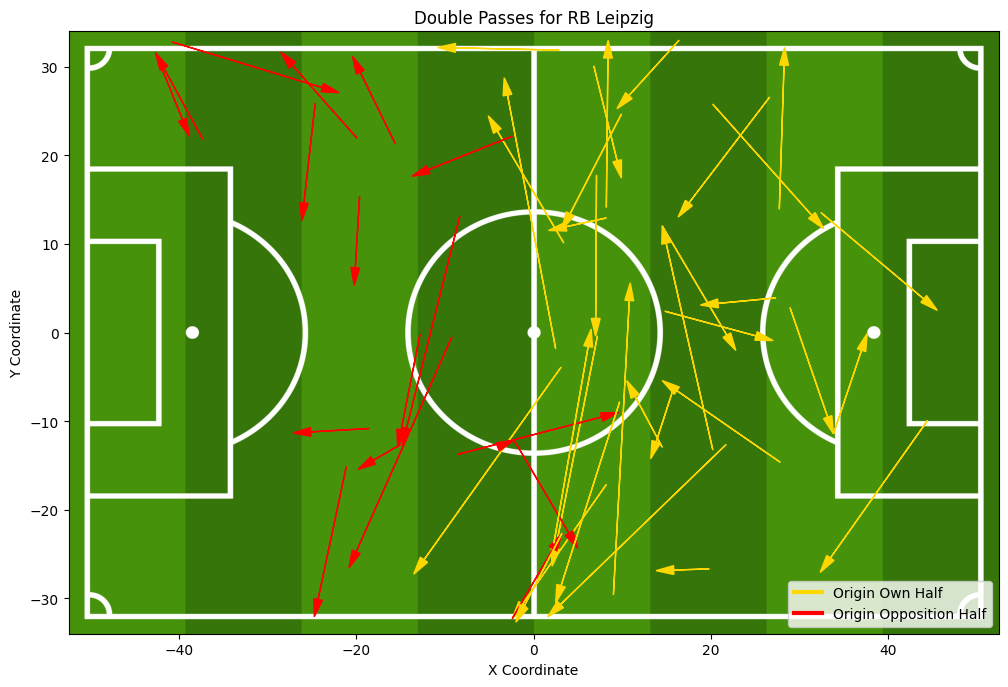

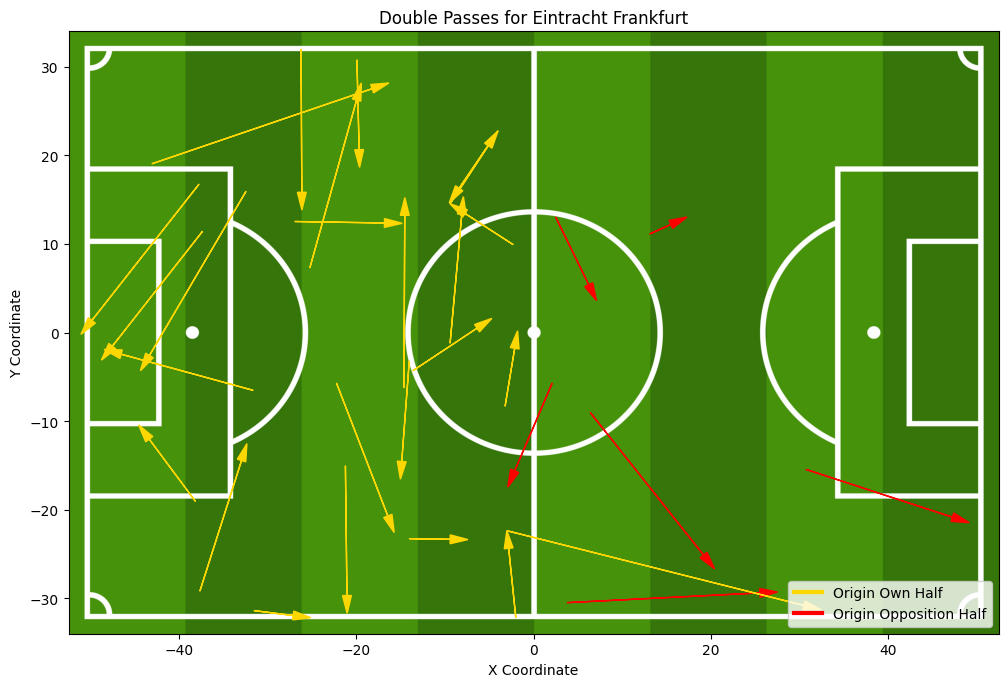

In [49]:
# Plotting for team 'DFL-CLU-000017' (RB Leipzig)
plot_field_passes('DFL-CLU-000017', 'gold', 'red', 'Double Passes for RB Leipzig')

# Plotting for team 'DFL-CLU-00000F' (Eintracht Frankfurt)
plot_field_passes('DFL-CLU-00000F', 'gold', 'red', 'Double Passes for Eintracht Frankfurt')

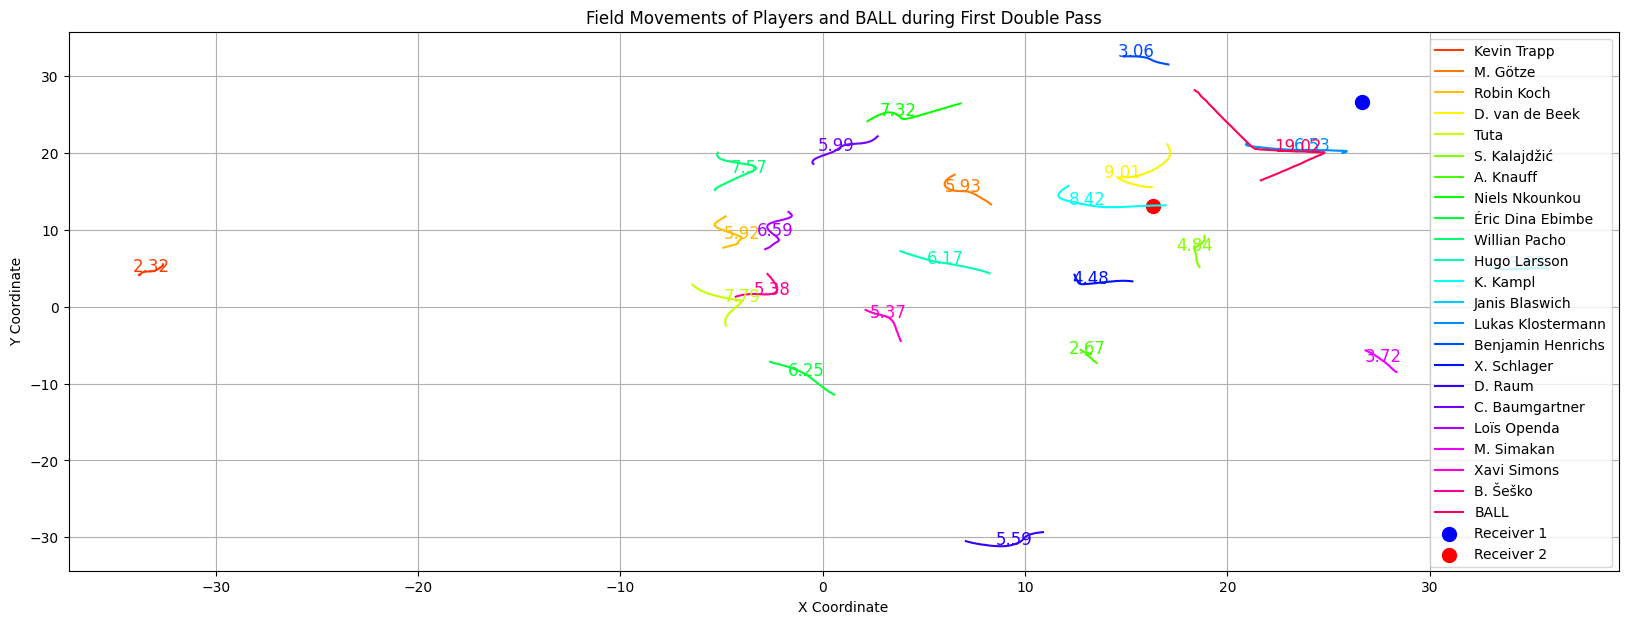

In [50]:

# Extract position data for the first double pass
double_pass_position = double_passes_data[0]

# Merge double_pass_positions with spd to get player names
double_pass_position = double_pass_position.merge(spd, on='PersonId', how='left')

# Fill NaN values in 'Kurname' with 'BALL'
double_pass_position['Kurname'].fillna('BALL', inplace=True)

# Get unique player names
unique_players = double_pass_position['Kurname'].unique()

# Generate a color palette with as many colors as there are unique players
palette = sns.color_palette("hsv", len(unique_players))

# Map player names to colors
player_colors = {name: palette[i] for i, name in enumerate(unique_players)}

# Calculate the average 'S' value for each player
player_averages = double_pass_position.groupby('Kurname')['S'].mean()

# Plotting
plt.figure(figsize=(20, 7))

# Plot players' movements with names and colors
for player in unique_players:
    player_df = double_pass_position[double_pass_position['Kurname'] == player]
    plt.plot(player_df['X'], player_df['Y'], color=player_colors[player], label=player)

    # Add average 'S' value as a text annotation
    avg_s = player_averages[player]
    mid_point = player_df.iloc[len(player_df) // 2]
    plt.text(mid_point['X'], mid_point['Y'], f'{avg_s:.2f}', color=player_colors[player], fontsize=12, ha='center')

# Preprocess event data coordinates to match the position data scale
evd['X-Position'] = (evd['X-Position'] - evd['X-Position'].min()) / (evd['X-Position'].max() - evd['X-Position'].min()) * 105 - 52.5
evd['Y-Position'] = (evd['Y-Position'] - evd['Y-Position'].min()) / (evd['Y-Position'].max() - evd['Y-Position'].min()) * 68 - 34

# Get the coordinates of the receivers for the first double pass
receiver_1 = evd.iloc[double_pass_indices[0][0]]
receiver_2 = evd.iloc[double_pass_indices[0][1]]

# Plot the receiver positions with dots
plt.scatter(receiver_1['X-Position'], receiver_1['Y-Position'], color='blue', marker='o', s=100, label='Receiver 1')
plt.scatter(receiver_2['X-Position'], receiver_2['Y-Position'], color='red', marker='o', s=100, label='Receiver 2')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Field Movements of Players and BALL during First Double Pass')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
#Merging position and event data for double passes
double_pass_positions = pd.concat(double_passes_data)

#labelling
pod['is_double_pass'] = 0
pod.loc[double_pass_positions.index, 'is_double_pass'] = 1



features = ['X', 'Y', 'S','D', 'A']

#features and labels
X = pod[features].fillna(0) 
y = pod['is_double_pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
pod['is_double_pass'].value_counts()

is_double_pass
0    3254707
1     126201
Name: count, dtype: int64

In [24]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict with logistic regression
y_pred_log_reg = log_reg.predict(X_test) 

In [25]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 96.26%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    976390
           1       0.00      0.00      0.00     37883

    accuracy                           0.96   1014273
   macro avg       0.48      0.50      0.49   1014273
weighted avg       0.93      0.96      0.94   1014273



In [26]:
#RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=42)

#Training
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [27]:
#Predictions on the test set
y_pred_clf = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_clf)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred_clf))

Accuracy: 98.21%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    976390
           1       0.99      0.53      0.69     37883

    accuracy                           0.98   1014273
   macro avg       0.99      0.76      0.84   1014273
weighted avg       0.98      0.98      0.98   1014273



In [28]:
#Feature importances
importances = clf.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

  Feature  Importance
1       Y    0.258690
0       X    0.246702
3       D    0.240444
2       S    0.140050
4       A    0.114114


In [29]:
#RandomForestClassifier
clf_w = RandomForestClassifier(n_estimators=200, random_state=42, class_weight={0 : 1, 1:10})

#Training
clf_w.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10}, n_estimators=200,
                       random_state=42)

In [30]:
#Predictions on the test set
y_pred_wrf = clf_w.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_wrf)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred_wrf))

Accuracy: 98.53%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    976390
           1       1.00      0.61      0.76     37883

    accuracy                           0.99   1014273
   macro avg       0.99      0.80      0.87   1014273
weighted avg       0.99      0.99      0.98   1014273



In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

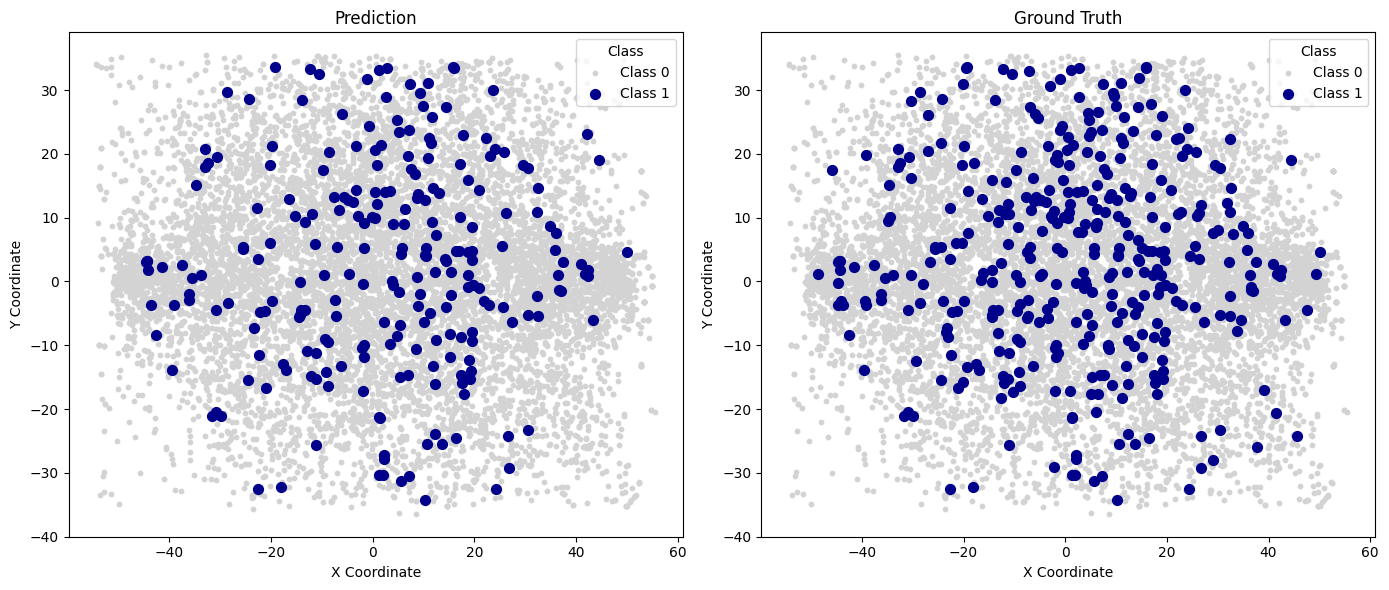

In [32]:
import matplotlib.pyplot as plt

#Conditions for class 0 and class 1 for predictions
class_0_pred = y_pred_wrf[:10000] == 0    #consering only the first 10000 instances as the data is too large
class_1_pred = y_pred_wrf[:10000] == 1

#Conditions for class 0 and class 1 for ground truth
class_0_true = y_test[:10000] == 0
class_1_true = y_test[:10000] == 1

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

#Plot for predictions
scatter_0 = ax[0].scatter(
    x=X_test['X'][:10000][class_0_pred],
    y=X_test['Y'][:10000][class_0_pred],
    c='lightgray',  # Light color for class 0
    s=10,  # Smaller size for class 0
    label="Class 0"
)
scatter_1 = ax[0].scatter(
    x=X_test['X'][:10000][class_1_pred],
    y=X_test['Y'][:10000][class_1_pred],
    c='darkblue',  
    s=50, 
    label="Class 1"
)
ax[0].legend(loc="upper right", title="Class")
ax[0].set_xlabel('X Coordinate')
ax[0].set_ylabel('Y Coordinate')
ax[0].set_title('Prediction')

#Plot for ground truth 
scatter_0 = ax[1].scatter(
    x=X_test['X'][:10000][class_0_true],
    y=X_test['Y'][:10000][class_0_true],
    c='lightgray',  
    s=10,  
    label="Class 0"
)
scatter_1 = ax[1].scatter(
    x=X_test['X'][:10000][class_1_true],
    y=X_test['Y'][:10000][class_1_true],
    c='darkblue',  
    s=50, 
    label="Class 1"
)
ax[1].legend(loc="upper right", title="Class")
ax[1].set_xlabel('X Coordinate')
ax[1].set_ylabel('Y Coordinate')
ax[1].set_title('Ground Truth')

plt.tight_layout()
plt.show()
